In [1]:
import pandas as pd
beer_consumption = pd.read_csv('Consumo_cerveja.csv')
beer_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [2]:
beer_consumption.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


- Data: Date
- Temperatura Media (C): nhiet do trung binh
- Temperatura Minima (C): nhiet do thap nhat
- Temperatura Maxima (C): nhiet do cao nhat
- Precipitacao (mm): luong mua (rain fall)
- Final de Semana: weekend or not (0 = not weekend, 1 = weekend)
- Consumo de cerveja (litros): luong bia tieu thu

In [ ]:
#Tim va toi uu hoa mo hinh multiple linear regression cho luong bia tieu thu?
#check xem mo hinh du bao nhu the nao?

In [3]:
beer_consumption.rename(columns = {'Data':'Date', 'Temperatura Media (C)':'mid_temp',
                         'Temperatura Minima (C)':'min_temp','Temperatura Maxima (C)':'max_temp',
                         'Precipitacao (mm)':'rain_fall','Final de Semana':'weekend',
                                  'Consumo de cerveja (litros)':'consumption'},inplace =True)
beer_consumption.head()

,Date,mid_temp,min_temp,max_temp,rain_fall,weekend,consumption
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


# Data cleansing

In [4]:
beer_consumption["mid_temp"] = beer_consumption["mid_temp"].str.replace(',', '.')
beer_consumption["mid_temp"] = beer_consumption["mid_temp"].astype(float)

In [5]:
beer_consumption["min_temp"] = beer_consumption["min_temp"].str.replace(',', '.')
beer_consumption["min_temp"] = beer_consumption["min_temp"].astype(float)

In [6]:
beer_consumption["max_temp"] = beer_consumption["max_temp"].str.replace(',', '.')
beer_consumption["max_temp"] = beer_consumption["max_temp"].astype(float)

In [7]:
beer_consumption["rain_fall"] = beer_consumption["rain_fall"].str.replace(',', '.')
beer_consumption["rain_fall"] = beer_consumption["rain_fall"].astype(float)

In [8]:
beer_consumption.head()

,Date,mid_temp,min_temp,max_temp,rain_fall,weekend,consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [9]:
beer_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   mid_temp     365 non-null    float64
 2   min_temp     365 non-null    float64
 3   max_temp     365 non-null    float64
 4   rain_fall    365 non-null    float64
 5   weekend      365 non-null    float64
 6   consumption  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 51.6+ KB


# Model

In [10]:
#full model
import statsmodels.formula.api as smf
lm = smf.ols(formula='consumption ~ mid_temp + min_temp + max_temp + rain_fall + weekend',
             data=beer_consumption).fit()
# print the coefficients
print(lm.summary())
#mid_temp and min_temp ko co quan he tuyen tinh voi biet consumption

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           1.19e-97
Time:                        08:10:13   Log-Likelihood:                -824.07
No. Observations:                 365   AIC:                             1660.
Df Residuals:                     359   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4447      0.845      7.627      0.0

In [11]:
#remove mid_temp and min_temp
import statsmodels.formula.api as smf
lm = smf.ols(formula='consumption ~  max_temp + rain_fall + C(weekend)',
             data=beer_consumption).fit()
# print the coefficients
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     313.5
Date:                Sun, 18 Jul 2021   Prob (F-statistic):          3.85e-100
Time:                        08:12:05   Log-Likelihood:                -824.09
No. Observations:                 365   AIC:                             1656.
Df Residuals:                     361   BIC:                             1672.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.4321      0.77

In [ ]:
# 72% of variables giai thich duoc bang mo hinh
# 1 = weekend, 0 = no weekend -> cuoi tuan luong bia tieu thu nhieu hon 5.1L so voi ngay trong tuan
# nhiet do cu cao hon 1oC thi luong bia tang them 0.67L
# Luong mua ma tang len 1 don vi thi luong bia tieu thu giam -0.05L

In [12]:
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
#predicting the target variable with the final model
y,X=dmatrices('consumption ~ max_temp + rain_fall + C(weekend)',
              beer_consumption,return_type="dataframe")
model = LinearRegression()
model = model.fit(X,y)
Y_Pred = model.predict(X)
Y_Pred[:5]

array([[28.15972214],
       [28.82826482],
       [31.60559388],
       [30.66750143],
       [25.35184291]])

In [13]:
y[:5]

,consumption
0,25.461
1,28.972
2,30.814
3,29.799
4,28.900


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


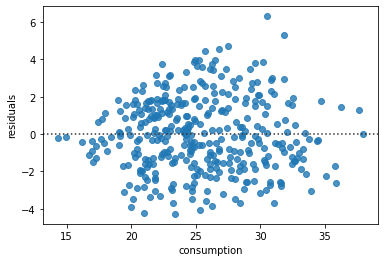

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
ax12=sns.residplot(y,Y_Pred)
ax12.set_ylabel('residuals')
plt.show()
#mo hinh du bao tot khi luong bia tieu thu <20 va >30, du bao kem trong khoang 20-30L

In [15]:
residuals = Y_Pred - y
residuals=residuals.rename(columns={'consumption':'residuals'})
residuals.head()

,residuals
0,2.698722
1,-0.143735
2,0.791594
3,0.868501
4,-3.548157


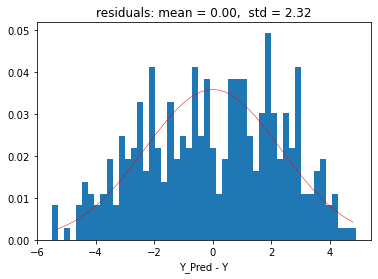

In [16]:
import scipy.stats as stats
import numpy as np
#plotting residual distribution 
# Bin
n, bin_edges = np.histogram(residuals, 50)
# Normalize it, so that every bins value gives the probability of that bin
bin_probability = n/float(n.sum())
# Get the mid points of every bin
bin_middles = (bin_edges[1:]+bin_edges[:-1])/2.
# Compute the bin-width
bin_width = bin_edges[1]-bin_edges[0]
# Plot the histogram of residuals
plt.bar(bin_middles, bin_probability, width=bin_width)

# Fit to normal distribution
(mu, sigma) = stats.norm.fit(residuals)
std = residuals.std()
#plotting normal curve  
y_norm = stats.norm.pdf(bin_middles, mu, sigma)*bin_width
l = plt.plot(bin_middles, y_norm, 'r', linewidth=0.5)
plt.title( "residuals: mean = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Y_Pred - Y')
plt.show()

In [ ]:
#Tim va toi uu hoa mo hinh multiple linear regression cho luong bia tieu thu? done
#check xem mo hinh du bao nhu the nao?
#ideal adjusted R-square >=0.8
# -> mo hinh du bao chua duoc tot, 